In [106]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

ERROR: tensorflow-gpu 2.4.1 has requirement absl-py~=0.10, but you'll have absl-py 1.3.0 which is incompatible.
ERROR: tensorflow-gpu 2.4.1 has requirement flatbuffers~=1.12.0, but you'll have flatbuffers 22.10.26 which is incompatible.
ERROR: tensorflow-gpu 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow-gpu 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.50.0 which is incompatible.
ERROR: tensorflow-gpu 2.4.1 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.



  Using cached tensorflow-2.10.0-cp38-cp38-win_amd64.whl (455.9 MB)
  Using cached flatbuffers-22.10.26-py2.py3-none-any.whl (26 kB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached numpy-1.23.4-cp38-cp38-win_amd64.whl (14.7 MB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.15.0
    Uninst

ERROR: tensorflow-gpu 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.23.4 which is incompatible.
ERROR: tensorflow-gpu 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 2.10.0 which is incompatible.


  Attempting uninstall: tensorflow-gpu
    Found existing installation: tensorflow-gpu 2.4.1
    Uninstalling tensorflow-gpu-2.4.1:
      Successfully uninstalled tensorflow-gpu-2.4.1


In [77]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [78]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("train 1",shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE)

Found 3208 files belonging to 20 classes.


In [79]:
class_names=dataset.class_names
class_names

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT']

In [80]:
len(dataset)

101

In [81]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy)

(32, 256, 256, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([19, 18,  4,  7,  0,  1,  0,  0,  9, 12,  0,  0,  6, 12,  4,  9,  1,
        2,  8,  3,  6, 15, 11, 12, 12,  2, 11, 16, 11,  8, 15,  5])>>


In [82]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[ 77.       101.        23.      ]
  [ 86.75     113.1875    32.75    ]
  [ 82.125    113.9375    30.875   ]
  ...
  [ 87.9375    97.5       34.4375  ]
  [ 78.25      92.375     18.5     ]
  [ 75.        94.        12.      ]]

 [[ 69.6875    93.6875    15.6875  ]
  [ 80.09766  106.53516   26.097656]
  [ 81.76953  112.46484   28.84375 ]
  ...
  [ 88.80078   96.6875    35.30078 ]
  [ 78.35156   92.32422   18.449219]
  [ 79.0625    97.25      15.25    ]]

 [[ 70.0625    94.75      14.6875  ]
  [ 76.71484  103.28125   22.457031]
  [ 80.828125 111.265625  27.515625]
  ...
  [ 91.44922   97.359375  37.476562]
  [ 82.671875  94.28906   22.476562]
  [ 82.0625    96.625     16.6875  ]]

 ...

 [[ 60.4375    72.8125    18.25    ]
  [ 66.37891   77.890625  20.636719]
  [ 73.67969   83.14453   21.875   ]
  ...
  [117.20703  134.69922   95.3125  ]
  [109.5625   127.3125    83.94141 ]
  [112.       129.75      85.3125  ]]

 [[ 68.9375    80.125     21.375   ]
  [ 78.02734   89.72266   

In [83]:
train_ds=dataset.take(1766)
train_ds
len(train_ds)

101

In [84]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split *ds_size)
    val_size=int(val_split *ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds
len(train_ds)

101

In [85]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [86]:
len(train_ds)

80

In [87]:
len(test_ds)

11

In [88]:
len(val_ds)

10

In [89]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [90]:
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [91]:
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [92]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/224)
])

In [93]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [109]:

import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm
from tensorflow import keras 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [110]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
VGG16_MODEL=tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [111]:
VGG16_MODEL.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(len(dataset),activation='softmax')

In [112]:
model = tf.keras.Sequential([
  VGG16_MODEL,
  global_average_layer,
  prediction_layer
])

In [113]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [114]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 101)               51813     
Total params: 14,766,501
Trainable params: 51,813
Non-trainable params: 14,714,688
_________________________________________________________________


In [118]:
history = model.fit(train_ds, epochs=EPOCHS, 
                    steps_per_epoch=80,
                    validation_steps=10,
                    validation_data=val_ds)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
80/80 [==============================] - ETA: 0s - loss: 8.5850 - accuracy: 0.1350WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000013E886EC550> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set 

KeyboardInterrupt: 

In [119]:
score= model.evaluate(test_ds)

11/11 [==============================] - 127s 7s/step - loss: 0.0857 - accuracy: 0.9801


In [120]:
score

[0.085697241127491, 0.9801136255264282]

In [121]:
acc=history.history['accuracy']
val_acc =history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

NameError: name 'history' is not defined

In [122]:
for image_batch,labels_batch in test_ds.take(1):
    
    print(image_batch[0].numpy())

[[[ 26.        37.        23.      ]
  [ 25.1875    37.        23.      ]
  [ 27.0625    39.0625    26.4375  ]
  ...
  [ 44.        49.        26.      ]
  [ 44.        49.1875    25.625   ]
  [ 44.        50.        24.      ]]

 [[ 23.5625    34.5625    20.5625  ]
  [ 22.75      34.5625    20.5625  ]
  [ 24.625     36.625     24.      ]
  ...
  [ 43.1875    48.1875    25.746094]
  [ 43.1875    48.375     24.8125  ]
  [ 43.1875    49.1875    23.1875  ]]

 [[ 23.        34.        18.625   ]
  [ 22.1875    34.558594  18.625   ]
  [ 23.589844  35.804688  21.589844]
  ...
  [ 43.        48.        25.6875  ]
  [ 43.        48.1875    24.625   ]
  [ 43.        49.        23.      ]]

 ...

 [[113.625     98.        90.0625  ]
  [165.11719  151.3711   142.6211  ]
  [173.26172  160.67969  154.49219 ]
  ...
  [ 34.76172   46.953125  43.804688]
  [ 38.132812  50.32422   54.898438]
  [ 42.5       55.25      63.125   ]]

 [[128.3125   111.5      100.9375  ]
  [166.19531  151.36328  140.14062 ]


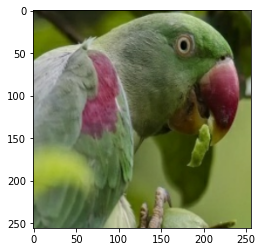

In [123]:
for image_batch,labels_batch in test_ds.take(1):
    
    plt.imshow(image_batch[0].numpy().astype('uint8'))

first image to predict
actual label: ABBOTTS BOOBY
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[2.14667689e-05 9.98450518e-01 8.26551627e-07 2.07897847e-05
 1.65512101e-05 6.50608058e-07 1.24058752e-05 2.37632616e-04
 9.35602002e-04 9.37524965e-06 6.90009756e-08 9.59825911e-07
 4.23150232e-06 1.83835888e-04 2.54533079e-05 4.81099778e-06
 5.85791327e-08 5.6

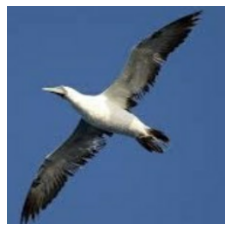

In [124]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis("off")

In [125]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

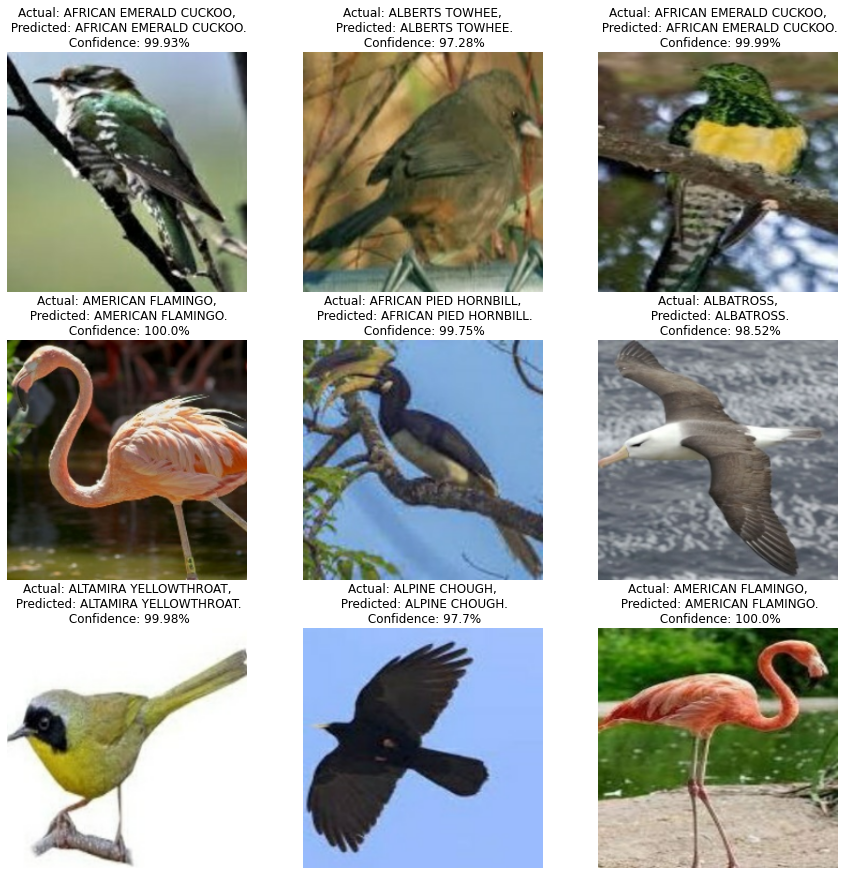

In [126]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [127]:
import os
model_version=max([int(i) for i in os.listdir("./model1") + [0]])+1
model.save(f"./model1/{model_version}")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: ./model1/2\assets
